In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Temp1.csv')
df.head(5)

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [3]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [4]:
df.shape

(3650, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [6]:
type(df['Temp'])

pandas.core.series.Series

In [11]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')
df['Date']

0      1981-01-01
1      1981-02-01
2      1981-03-01
3      1981-04-01
4      1981-05-01
          ...    
3645   1990-12-27
3646   1990-12-28
3647   1990-12-29
3648   1990-12-30
3649   1990-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]

In [10]:
df.isnull().sum()

Date    0
Temp    0
dtype: int64

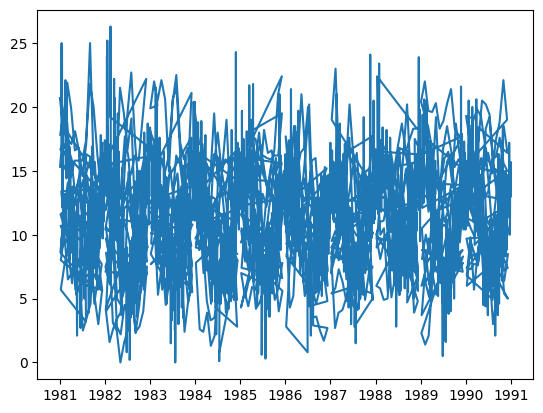

In [13]:
plt.plot (df['Date'],df['Temp'])

In [14]:
# use month to predict the pattern
# create 12 month moving average
df['MA12'] = df['Temp'].rolling(12).mean()

In [15]:
df['MA12']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3645    13.875000
3646    13.875000
3647    13.841667
3648    13.716667
3649    13.575000
Name: MA12, Length: 3650, dtype: float64

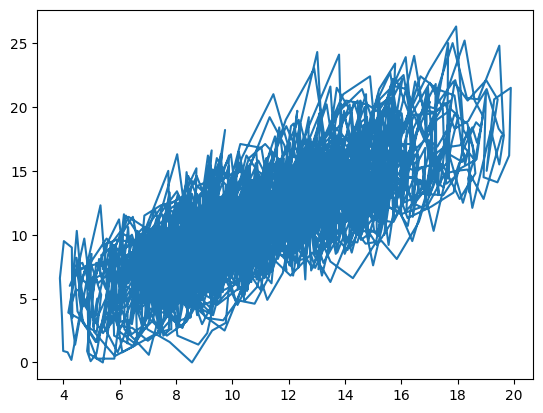

In [16]:
plt.plot(df['MA12'],df['Temp'])

In [18]:
# extract month and year from  dates
df['Month'] = [i.month for i in df['Date']]

In [19]:
df['Year'] = [i.year for i in df['Date']]

In [20]:
# create a sequence
df['Series'] = np.arange(1,len(df)+1)

In [22]:
df =df[['Series','Year','Month','Temp']]

In [23]:
df

,Series,Year,Month,Temp
0,1,1981,1,20.7
1,2,1981,2,17.9
2,3,1981,3,18.8
3,4,1981,4,14.6
4,5,1981,5,15.8
...,...,...,...,...
3645,3646,1990,12,14.0
3646,3647,1990,12,13.6
3647,3648,1990,12,13.5
3648,3649,1990,12,15.7


In [24]:
df.head()

,Series,Year,Month,Temp
0,1,1981,1,20.7
1,2,1981,2,17.9
2,3,1981,3,18.8
3,4,1981,4,14.6
4,5,1981,5,15.8


In [26]:
x = df[['Series','Year','Month']]
y =df['Temp']

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-1.73157634, -1.5666989 , -1.60150798],
       [-1.73062727, -1.5666989 , -1.31140852],
       [-1.7296782 , -1.5666989 , -1.02130906],
       ...,
       [ 1.7296782 ,  1.5666989 ,  1.58958608],
       [ 1.73062727,  1.5666989 ,  1.58958608],
       [ 1.73157634,  1.5666989 ,  1.58958608]])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:

y_pred = lr.predict(x_test)
y_pred

array([10.99011098, 10.85740663, 10.35251996, 10.40957863, 13.15781455,
        9.56190518, 12.54178423, 12.15917394,  9.41509749,  9.8908604 ,
       12.72214737, 12.34407492, 11.26081867,  9.82504715, 11.95168638,
       12.70966544, 12.18948656, 11.52158292, 12.67416482, 10.65089078,
       12.04548915, 12.65514526, 10.58653817, 11.76824383, 12.59452001,
        9.76798848, 11.2765954 , 11.67460448, 10.97833338,  9.57179443,
       11.10925554, 12.69583123,  9.73292042, 10.35743618, 11.39141707,
       11.65455904,  9.66056954, 11.17641842, 12.95216644,  9.67186261,
       11.02464033, 12.69837237, 11.93672057, 10.33112268,  9.53256646,
       11.54551869, 10.22235411, 10.76225467,  9.36695417, 13.24815954,
        9.41390863, 11.51266757, 10.03604667, 12.68826816, 11.74803542,
       11.0535465 , 12.36034103,  9.72876051, 12.45900539, 10.68401368,
       11.42232302, 11.4200541 , 11.41708305, 11.85545435, 10.63721999,
       10.44189104, 10.68860614,  9.7324905 ,  9.71227945, 11.71

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
mse = metrics.mean_squared_error(y_test,y_pred)
mse

17.02169293178456

In [35]:
r2_score(y_test,y_pred)

0.07493843619898

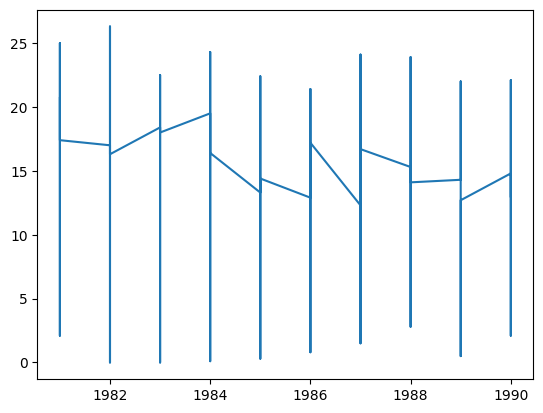

In [37]:
plt.plot(df['Year'],df['Temp'])

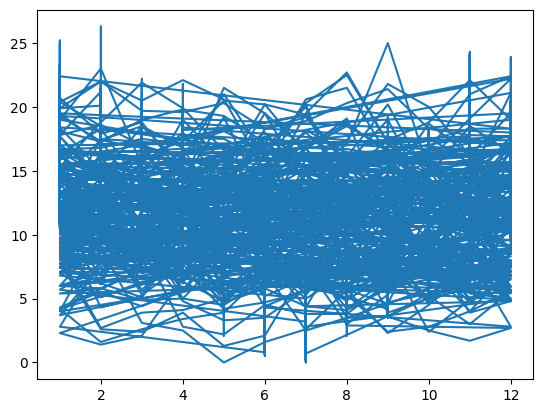

In [38]:
plt.plot(df['Month'],df['Temp'])

In [54]:
df = pd.read_csv('df_vacation.csv',parse_dates=['Month'],index_col=0)
df.sample(5)

,Num_Search_Vacation
Month,
2017-08-01,49
2019-06-01,58
2013-03-01,55
2011-05-01,62
2013-02-01,54


In [45]:
df.shape

(190, 1)

<Axes: xlabel='Month'>

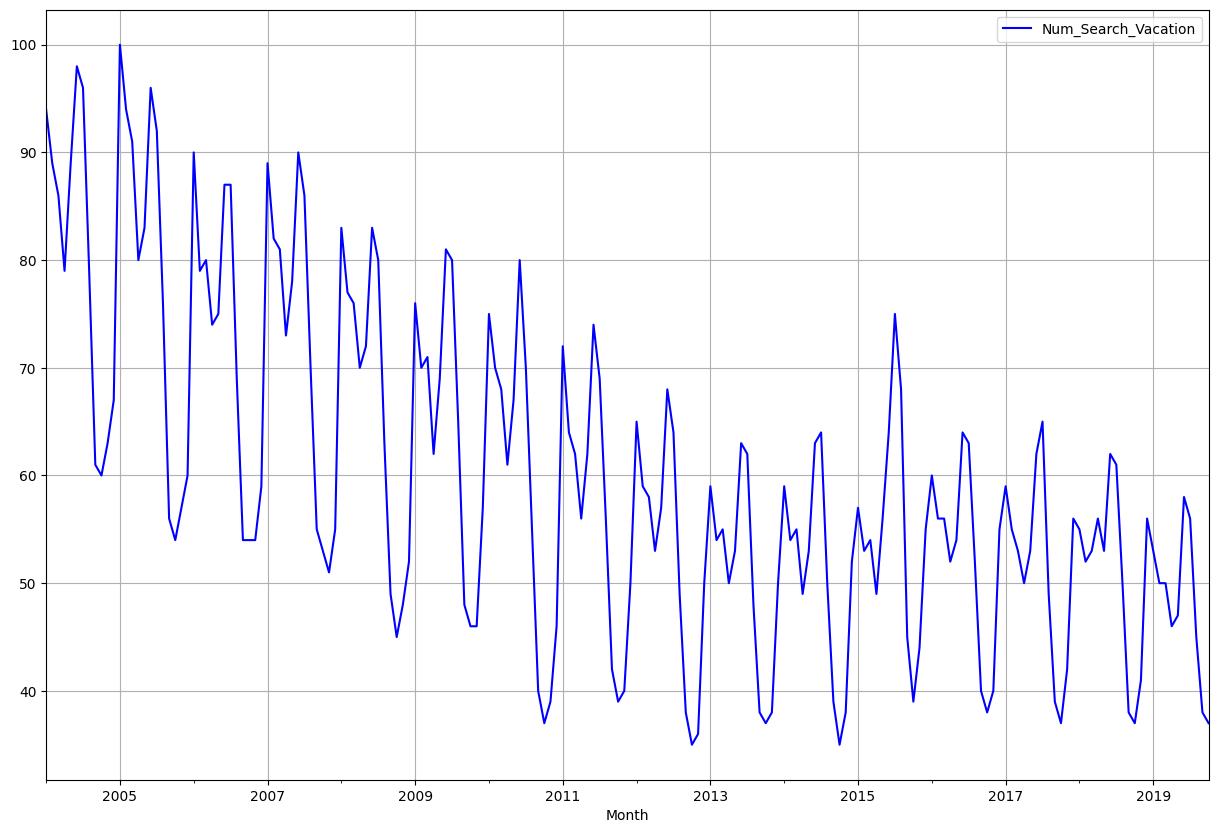

In [49]:
df.plot(color='blue',grid=True,figsize=(15,10))

In [55]:
df = pd.read_csv('df_bankofamerica.csv',parse_dates=['Date'],index_col=0)
df.sample(5)

,Adj Close Price
Date,
2017-09-28,24.463799
2003-02-28,21.979034
2005-01-05,32.953835
2002-08-01,19.828800
2014-01-24,15.096566


<Axes: xlabel='Date'>

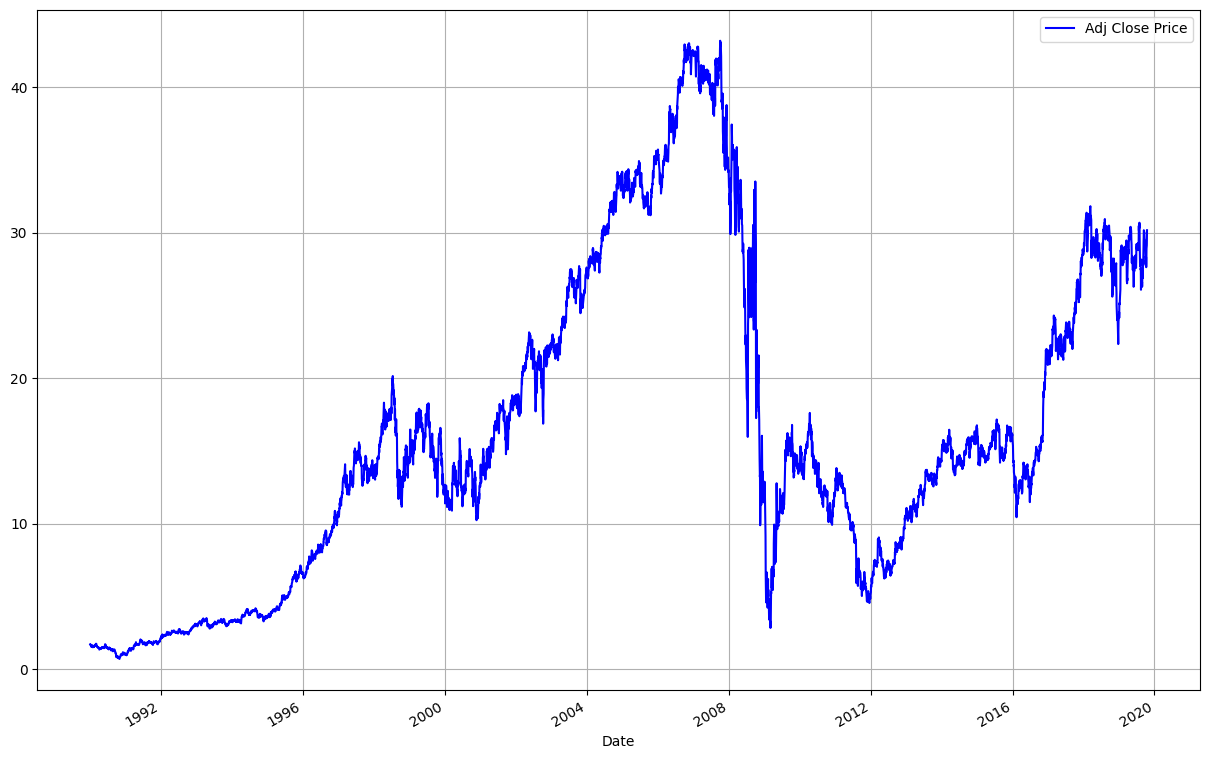

In [56]:
df.plot(color='blue',grid=True,figsize=(15,10))

In [57]:
df= pd.read_csv('df_furniture.csv',parse_dates=['Month'],index_col=0)
df.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


<Axes: xlabel='Month'>

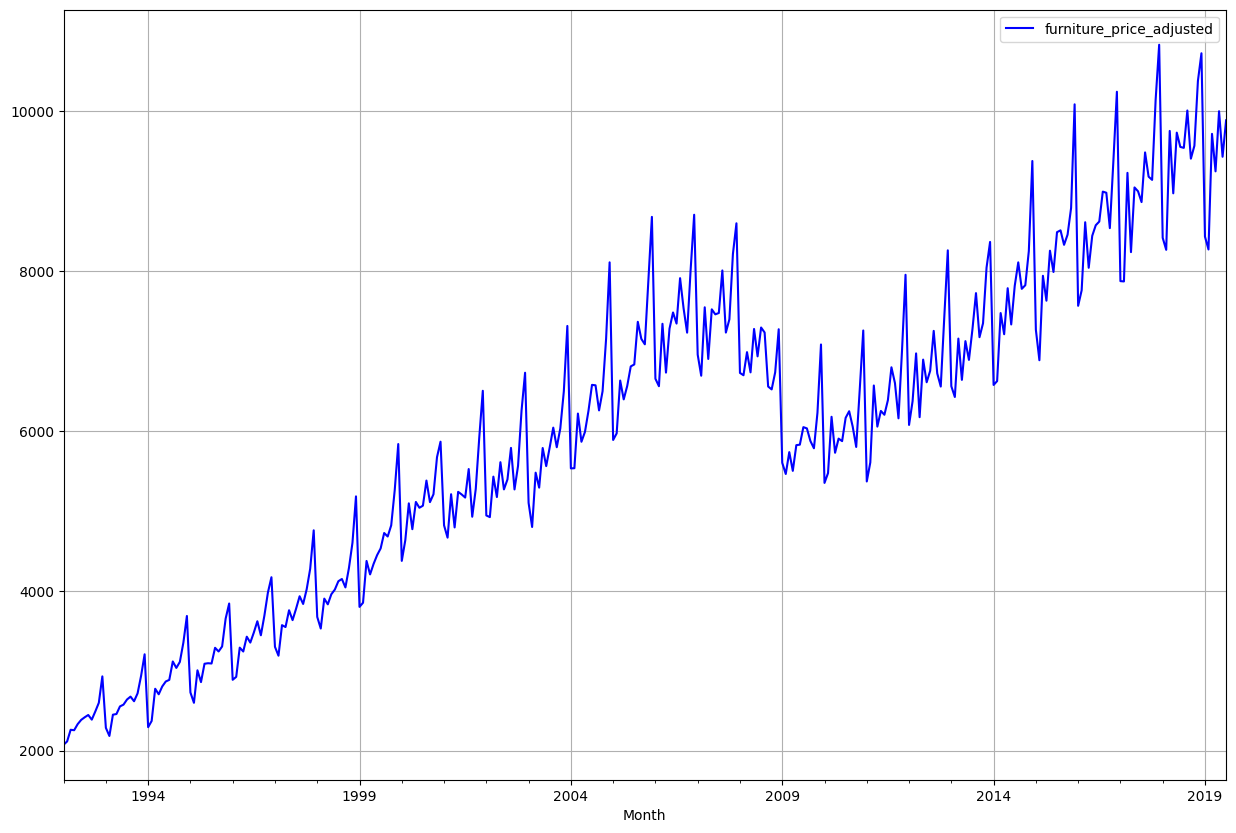

In [58]:
df.plot(color='blue',grid=True,figsize=(15,10))

In [60]:
df= pd.read_csv('df_jpmorgan.csv',parse_dates=['Date'],index_col=0)
df.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


<Axes: xlabel='Date'>

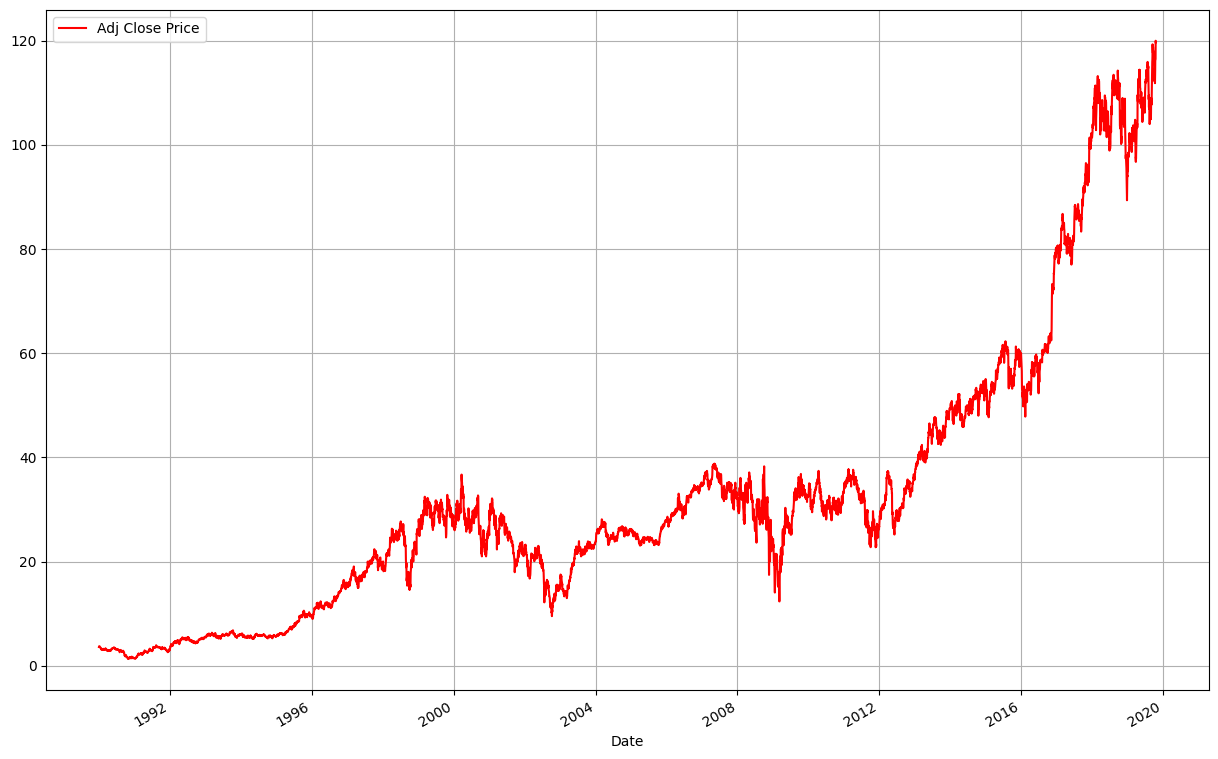

In [62]:
df.plot(color='Red',grid=True,figsize=(15,10))